# Dự đoán giá nhà trên Boston dataset với mạng neural


In [43]:
import tensorflow as tf
import matplotlib as plt
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.optimizers import Adam, RMSprop, SGD
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [44]:
df = pd.read_csv('Boston.csv', header = 'infer', encoding = 'latin1')
X = df.drop(columns=['medv'])
y = df['medv']

In [45]:
df.head(5)

,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [88]:
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

In [89]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state=123)
n_vars = X_train.shape[1]


In [48]:
my_model = Sequential()
my_model.add(Dense(input_dim=n_vars, units = 1, activation='linear')) #Bài toán dự đoán nên output units = 1

In [97]:
n_epochs = 500
batch_size = 10
learn_rate = 0.002

In [98]:
my_optimizer = Adam(learn_rate)
my_model.compile(loss = 'mae', optimizer = my_optimizer, metrics=["mse"])

In [78]:
my_summary = my_model.fit(X_train, y_train, epochs = n_epochs, batch_size = batch_size, validation_split=0.2, verbose = 0)

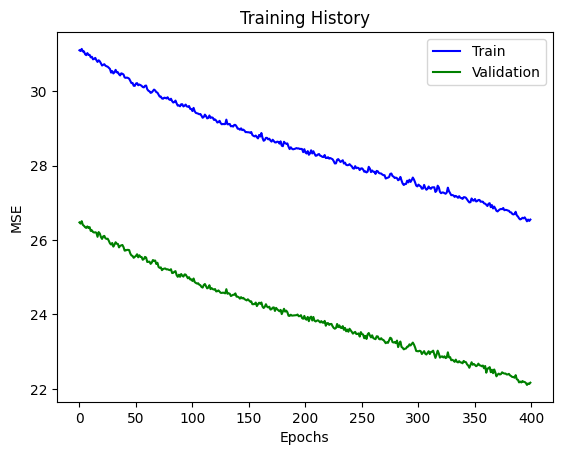

In [79]:
n_skip = 100
plt.plot(my_summary.history['mse'][n_skip:], c = "b")
plt.plot(my_summary.history['val_mse'][n_skip:],c="g")
plt.title('Training History')
plt.ylabel('MSE')
plt.xlabel('Epochs')
plt.legend(['Train','Validation'],loc='upper right')

In [80]:
y_pred = my_model.predict(X_test)[:,0]
RMSE = np.sqrt(np.mean(y_test-y_pred)**2)
np.round(RMSE,3)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


np.float64(1.169)

In [81]:
MSE = my_model.evaluate(X_test, y_test,verbose=0)[1]
RMSE = np.sqrt(MSE)
print("Test RMSE:{}".format(np.round(RMSE,3)))

Test RMSE:5.654


# Thử nghiệm mô hình 2 với 1 lớp Input và 1 lớp Dense

In [82]:
from tensorflow.keras.models import Model # Mô hình hóa kiến trúc mạng
from tensorflow.keras.layers import Input, Dense

In [83]:
my_input = Input(shape=(n_vars,))
my_output = Dense(units=1, activation='linear')(my_input)

In [84]:
my_model2 = Model(inputs = my_input, outputs = my_output)
my_model2.summary()

Model: "functional_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_6 (InputLayer)      │ (None, 14)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 1)              │            15 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 15 (60.00 B)

 Trainable params: 15 (60.00 B)

 Non-trainable params: 0 (0.00 B)

In [99]:
my_model2.compile(loss="mae", optimizer = my_optimizer, metrics=["mse"])

In [100]:
import tensorflow as tf
tf.config.run_functions_eagerly(True)
#my_summary = my_model2.fit(X_train, y_train, epochs = n_epochs, batch_size = batch_size, validation_split=0.2, verbose = 0)
my_summary = my_model2.fit(X_train, y_train, epochs = n_epochs, batch_size = batch_size, validation_split = 0.2, verbose = 0)

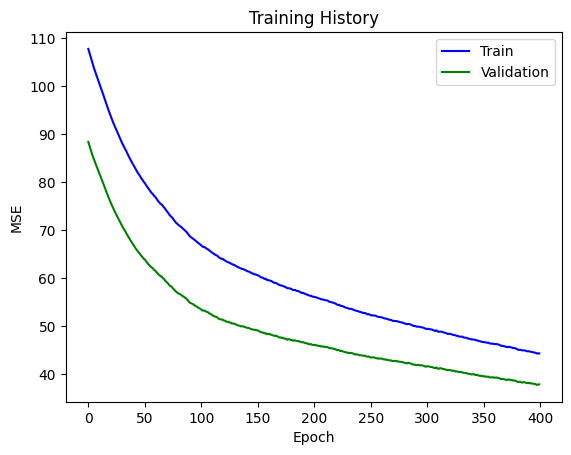

In [101]:
n_skip = 100
plt.plot(my_summary.history['mse'][n_skip:], c="b")
plt.plot(my_summary.history['val_mse'][n_skip:], c="g")
plt.title('Training History')
plt.ylabel('MSE')
plt.xlabel('Epoch')
plt.legend(['Train','Validation'], loc = 'upper right')
plt.show()